### Extract regular signals from a noisy data set

In [78]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')

In [33]:
# open data
with open("signal.dat") as f:
    data = f.readlines()
t = np.array([float(line.split()[0]) for line in data[1:]])
counts = np.array([float(line.split()[1]) for line in data[1:]])

Plot the signal.

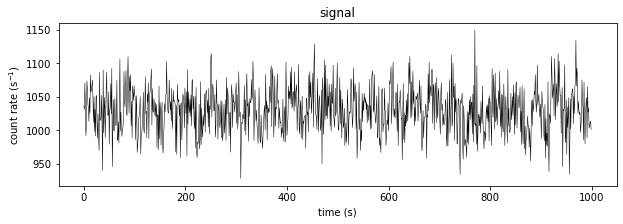

In [74]:
plt.figure(figsize=(10,3))
plt.plot(t, counts, c="k", linewidth="0.5")
plt.xlabel("time (s)")
plt.ylabel("count rate (s$^{-1}$)")
plt.title("signal")
plt.show()

Compute the FFT of the signal.

In [87]:
n = counts.size
dt = 1.
fft_counts = fftshift(fft(counts))
freq = fftshift(fftfreq(n, dt))

Plot the FFT of the signal.

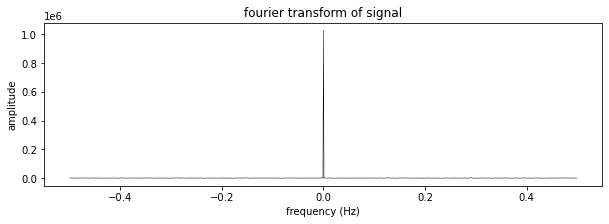

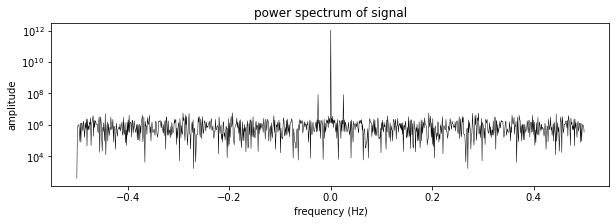

In [140]:
# plot fft of signal
plt.figure(figsize=(10,3))
plt.plot(freq, fft_counts, c="k", linewidth="0.5")
#plt.ylim((-3000,3000))
plt.xlabel("frequency (Hz)")
plt.ylabel("amplitude")
plt.title("fourier transform of signal")

# plot power spectrum of signal in log scale
plt.figure(figsize=(10,3))
power = np.abs(fft_counts)**2
plt.plot(freq, power, c="k", linewidth="0.5")
plt.yscale("log")
plt.xlabel("frequency (Hz)")
plt.ylabel("amplitude")
plt.title("power spectrum of signal")
plt.show()

Determine the frequencies of any real signals. 

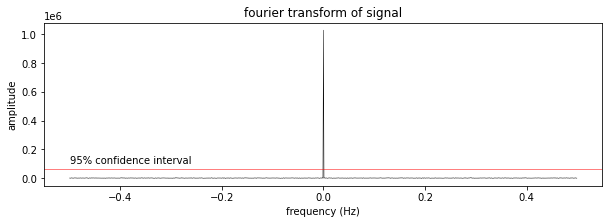

In [143]:
mean = np.mean(fft_counts)
sigma = np.std(fft_counts)
plt.figure(figsize=(10,3))
plt.plot(freq, fft_counts, c="k", linewidth="0.5")
plt.xlabel("frequency (Hz)")
plt.ylabel("amplitude")
plt.axhline(y=mean+2*sigma, color='r', linewidth="0.5")
plt.title("fourier transform of signal")
plt.text(-0.5, 0.1e6, "95% confidence interval")
plt.show()

In [147]:
# find the peaks above the threshold
ind, value = find_peaks(fft_counts, height=mean+2*sigma)
print("peaks at frequency:", freq[ind])
print("peaks amplitude:", value['peak_heights'])
print("error of amplitude:", np.std(fft_counts))

peaks at frequency: [0.]
peaks amplitude: [1029783.49529]
error of amplitude: 32565.751403208036
